<a href="https://colab.research.google.com/github/jonokay1/MakeMoneyWithMachineLearning/blob/master/Week%206/Fashion_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Generative Adverserial Network 

An implementation of GAN on the Fashion-MNIST dataset

In [0]:
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams["figure.figsize"]= 7,7

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import UpSampling2D, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D, LeakyReLU

import sys
import numpy as np

In [0]:
# lodaing data
dataset = fashion_mnist

In [0]:
#helper class
class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1 #the images we are going to use are black and white.
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 10 #we initialize the noise that the generator takes in.

        optimizer = Adam(0.0002, 0.5) #the optimizer we are going to work with

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))

        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=64, sample_interval=50):

        # Load the dataset
        (x_train, y_train), (x_test, y_test) = dataset.load_data()

        # Rescale -1 to 1
        x_train = x_train / 127.5 - 1.
        x_train = np.expand_dims(x_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, x_train.shape[0], batch_size)
            imgs = x_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        #fig.savefig("images/%d.png" % epoch)
        plt.show()
        plt.close()

In [0]:
def plot_images(selection, num=3):
  for i in range(num):
    plt.subplot(330+1+i)
    plt.subplots_adjust(wspace = 0.5, hspace=1)
    plt.imshow(selection[i])
  
  plt.show()

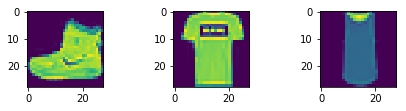

In [43]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()
plot_images(x_train)

In [0]:
x_train = x_train/127.5-1
x_train = np.expand_dims(x_train, axis=3)

In [45]:
def build_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(2048))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(2048))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = build_generator()
j = Input(shape=(100,))
img = generator(j)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_69 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_45 (Batc (None, 256)               1024      
_________________________________________________________________
dense_77 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_70 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 512)               2048      
_________________________________________________________________
dense_78 (Dense)             (None, 1024)            

In [46]:
def build_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))

  model.add(Dense(512))
  model.add(LeakyReLU(0.2))

  model.add(Dense(256))
  model.add(LeakyReLU(0.2))

  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_76 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_77 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_______________________________________________

In [0]:
validity = discriminator(img)
combined = Model(j, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0])
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

0 [D loss: 0.663022, acc.: 46.88%] [G loss: 0.603743]


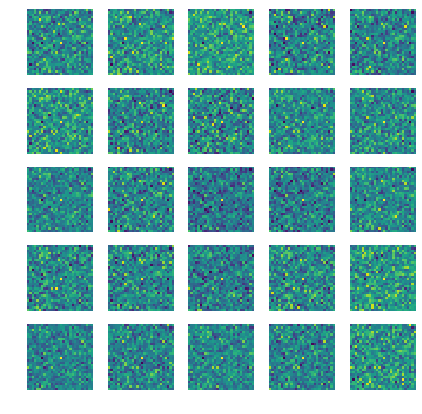

1 [D loss: 0.428393, acc.: 53.12%] [G loss: 0.581061]
2 [D loss: 0.377657, acc.: 81.25%] [G loss: 0.577049]
3 [D loss: 0.299531, acc.: 100.00%] [G loss: 0.521601]
4 [D loss: 0.195935, acc.: 100.00%] [G loss: 0.482826]
5 [D loss: 0.137280, acc.: 100.00%] [G loss: 0.537098]
6 [D loss: 0.094582, acc.: 100.00%] [G loss: 0.448298]
7 [D loss: 0.088982, acc.: 100.00%] [G loss: 0.487939]
8 [D loss: 0.076036, acc.: 100.00%] [G loss: 0.523581]
9 [D loss: 0.108637, acc.: 100.00%] [G loss: 0.511289]
10 [D loss: 0.099688, acc.: 100.00%] [G loss: 0.607357]
11 [D loss: 0.172290, acc.: 95.31%] [G loss: 0.802632]
12 [D loss: 0.191875, acc.: 92.19%] [G loss: 0.872574]
13 [D loss: 0.215907, acc.: 87.50%] [G loss: 1.109813]
14 [D loss: 0.212257, acc.: 90.62%] [G loss: 1.479955]
15 [D loss: 0.170381, acc.: 96.88%] [G loss: 1.708236]
16 [D loss: 0.138174, acc.: 100.00%] [G loss: 1.890899]
17 [D loss: 0.143812, acc.: 96.88%] [G loss: 2.054385]
18 [D loss: 0.097460, acc.: 98.44%] [G loss: 2.301366]
19 [D loss

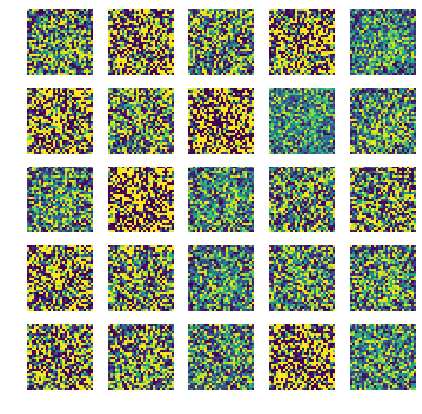

51 [D loss: 0.056930, acc.: 98.44%] [G loss: 3.169451]
52 [D loss: 0.035085, acc.: 100.00%] [G loss: 3.325654]
53 [D loss: 0.035943, acc.: 100.00%] [G loss: 3.117571]
54 [D loss: 0.034730, acc.: 100.00%] [G loss: 3.170202]
55 [D loss: 0.077520, acc.: 98.44%] [G loss: 3.376105]
56 [D loss: 0.054625, acc.: 100.00%] [G loss: 3.871027]
57 [D loss: 0.031064, acc.: 100.00%] [G loss: 3.438134]
58 [D loss: 0.022762, acc.: 100.00%] [G loss: 3.554763]
59 [D loss: 0.033337, acc.: 100.00%] [G loss: 3.473137]
60 [D loss: 0.044248, acc.: 100.00%] [G loss: 3.119378]
61 [D loss: 0.032347, acc.: 100.00%] [G loss: 3.273890]
62 [D loss: 0.038231, acc.: 100.00%] [G loss: 3.177458]
63 [D loss: 0.037987, acc.: 100.00%] [G loss: 3.070250]
64 [D loss: 0.059355, acc.: 98.44%] [G loss: 3.191162]
65 [D loss: 0.028833, acc.: 100.00%] [G loss: 3.326908]
66 [D loss: 0.030334, acc.: 100.00%] [G loss: 3.313046]
67 [D loss: 0.037737, acc.: 98.44%] [G loss: 3.108354]
68 [D loss: 0.078916, acc.: 96.88%] [G loss: 2.90944

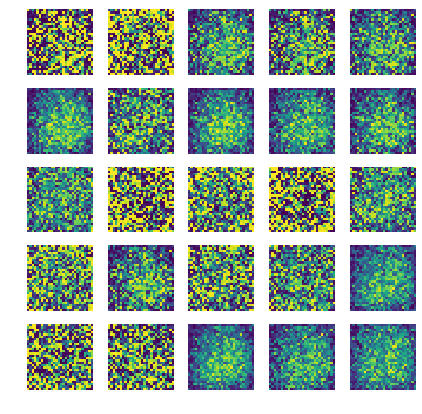

101 [D loss: 0.222722, acc.: 95.31%] [G loss: 2.690372]
102 [D loss: 0.145134, acc.: 93.75%] [G loss: 3.061816]
103 [D loss: 0.180609, acc.: 92.19%] [G loss: 3.062551]
104 [D loss: 0.176185, acc.: 89.06%] [G loss: 3.389303]
105 [D loss: 0.351384, acc.: 85.94%] [G loss: 2.745296]
106 [D loss: 0.230999, acc.: 85.94%] [G loss: 3.028565]
107 [D loss: 0.202318, acc.: 89.06%] [G loss: 3.395181]
108 [D loss: 0.273900, acc.: 87.50%] [G loss: 2.682528]
109 [D loss: 0.185108, acc.: 90.62%] [G loss: 2.893997]
110 [D loss: 0.181061, acc.: 90.62%] [G loss: 2.852070]
111 [D loss: 0.240621, acc.: 89.06%] [G loss: 2.807955]
112 [D loss: 0.155684, acc.: 90.62%] [G loss: 2.876691]
113 [D loss: 0.473017, acc.: 79.69%] [G loss: 2.966325]
114 [D loss: 0.147979, acc.: 93.75%] [G loss: 3.036024]
115 [D loss: 0.198835, acc.: 90.62%] [G loss: 3.217444]
116 [D loss: 0.268026, acc.: 84.38%] [G loss: 2.644909]
117 [D loss: 0.217880, acc.: 87.50%] [G loss: 3.091491]
118 [D loss: 0.195428, acc.: 89.06%] [G loss: 3.

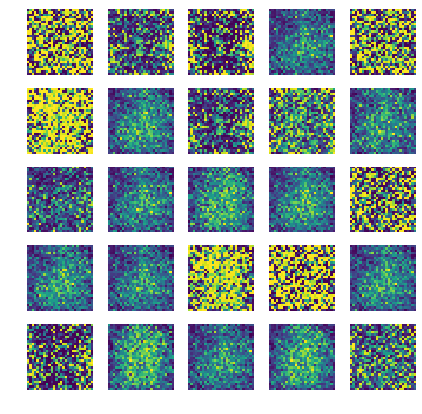

151 [D loss: 0.207544, acc.: 87.50%] [G loss: 3.377524]
152 [D loss: 0.374138, acc.: 81.25%] [G loss: 2.913907]
153 [D loss: 0.178674, acc.: 90.62%] [G loss: 3.351215]
154 [D loss: 0.225856, acc.: 84.38%] [G loss: 3.058771]
155 [D loss: 0.391128, acc.: 81.25%] [G loss: 2.973058]
156 [D loss: 0.174467, acc.: 92.19%] [G loss: 2.839964]
157 [D loss: 0.197141, acc.: 92.19%] [G loss: 2.891860]
158 [D loss: 0.203151, acc.: 87.50%] [G loss: 3.188158]
159 [D loss: 0.274490, acc.: 85.94%] [G loss: 3.583536]
160 [D loss: 0.259760, acc.: 84.38%] [G loss: 2.990699]
161 [D loss: 0.192741, acc.: 89.06%] [G loss: 2.512649]
162 [D loss: 0.197843, acc.: 89.06%] [G loss: 2.824419]
163 [D loss: 0.247692, acc.: 85.94%] [G loss: 2.791248]
164 [D loss: 0.576566, acc.: 73.44%] [G loss: 2.877636]
165 [D loss: 0.301065, acc.: 79.69%] [G loss: 3.235323]
166 [D loss: 0.085720, acc.: 100.00%] [G loss: 3.818161]
167 [D loss: 0.243092, acc.: 93.75%] [G loss: 2.653373]
168 [D loss: 0.271406, acc.: 84.38%] [G loss: 2

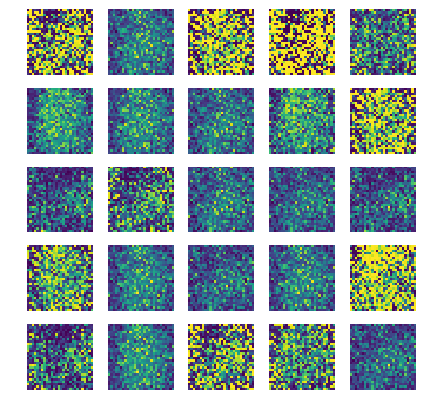

201 [D loss: 0.338655, acc.: 78.12%] [G loss: 2.499753]
202 [D loss: 0.313639, acc.: 78.12%] [G loss: 2.916715]
203 [D loss: 0.326268, acc.: 75.00%] [G loss: 2.570003]
204 [D loss: 0.513353, acc.: 65.62%] [G loss: 2.559510]
205 [D loss: 0.441865, acc.: 75.00%] [G loss: 2.183996]
206 [D loss: 0.197061, acc.: 90.62%] [G loss: 2.245906]
207 [D loss: 0.392317, acc.: 67.19%] [G loss: 2.138745]
208 [D loss: 0.222400, acc.: 95.31%] [G loss: 2.464267]
209 [D loss: 0.311005, acc.: 76.56%] [G loss: 2.210601]
210 [D loss: 0.378685, acc.: 75.00%] [G loss: 2.585300]
211 [D loss: 0.238090, acc.: 90.62%] [G loss: 2.303255]
212 [D loss: 0.648867, acc.: 57.81%] [G loss: 2.602258]
213 [D loss: 0.198374, acc.: 96.88%] [G loss: 2.558689]
214 [D loss: 0.525919, acc.: 67.19%] [G loss: 1.738038]
215 [D loss: 0.286506, acc.: 89.06%] [G loss: 2.566882]
216 [D loss: 0.198414, acc.: 93.75%] [G loss: 2.791007]
217 [D loss: 0.432866, acc.: 65.62%] [G loss: 2.553843]
218 [D loss: 0.389498, acc.: 82.81%] [G loss: 2.

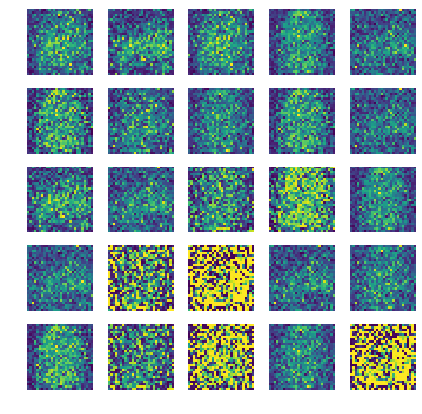

251 [D loss: 0.544270, acc.: 64.06%] [G loss: 2.332397]
252 [D loss: 0.271330, acc.: 92.19%] [G loss: 1.991646]
253 [D loss: 0.350491, acc.: 84.38%] [G loss: 1.836919]
254 [D loss: 0.359038, acc.: 79.69%] [G loss: 2.273404]
255 [D loss: 0.308244, acc.: 85.94%] [G loss: 2.793786]
256 [D loss: 0.393554, acc.: 85.94%] [G loss: 2.477343]
257 [D loss: 0.397472, acc.: 76.56%] [G loss: 2.071700]
258 [D loss: 0.384463, acc.: 76.56%] [G loss: 2.160933]
259 [D loss: 0.567776, acc.: 62.50%] [G loss: 2.039536]
260 [D loss: 0.350159, acc.: 87.50%] [G loss: 2.160904]
261 [D loss: 0.528738, acc.: 65.62%] [G loss: 1.877594]
262 [D loss: 0.284666, acc.: 89.06%] [G loss: 1.741231]
263 [D loss: 0.310399, acc.: 87.50%] [G loss: 2.136925]
264 [D loss: 0.369358, acc.: 84.38%] [G loss: 2.515584]
265 [D loss: 0.441703, acc.: 71.88%] [G loss: 2.163963]
266 [D loss: 0.351692, acc.: 87.50%] [G loss: 2.211945]
267 [D loss: 0.381269, acc.: 79.69%] [G loss: 2.280119]
268 [D loss: 0.408214, acc.: 76.56%] [G loss: 2.

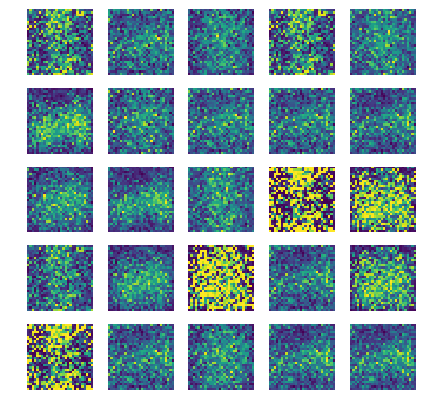

301 [D loss: 0.378589, acc.: 81.25%] [G loss: 2.002446]
302 [D loss: 0.304463, acc.: 89.06%] [G loss: 2.493344]
303 [D loss: 0.532329, acc.: 65.62%] [G loss: 1.649503]
304 [D loss: 0.351578, acc.: 89.06%] [G loss: 2.410949]
305 [D loss: 0.545627, acc.: 64.06%] [G loss: 2.019613]
306 [D loss: 0.261673, acc.: 93.75%] [G loss: 2.710146]
307 [D loss: 0.338136, acc.: 87.50%] [G loss: 2.137375]
308 [D loss: 0.353727, acc.: 85.94%] [G loss: 2.376740]
309 [D loss: 0.327397, acc.: 89.06%] [G loss: 1.748545]
310 [D loss: 0.411530, acc.: 79.69%] [G loss: 1.335891]
311 [D loss: 0.314189, acc.: 90.62%] [G loss: 1.688496]
312 [D loss: 0.597178, acc.: 57.81%] [G loss: 2.083731]
313 [D loss: 0.335325, acc.: 85.94%] [G loss: 1.334575]
314 [D loss: 0.304777, acc.: 87.50%] [G loss: 2.447288]
315 [D loss: 0.249022, acc.: 95.31%] [G loss: 2.627725]
316 [D loss: 0.314257, acc.: 90.62%] [G loss: 1.712021]
317 [D loss: 0.251779, acc.: 92.19%] [G loss: 2.243566]
318 [D loss: 0.323706, acc.: 87.50%] [G loss: 1.

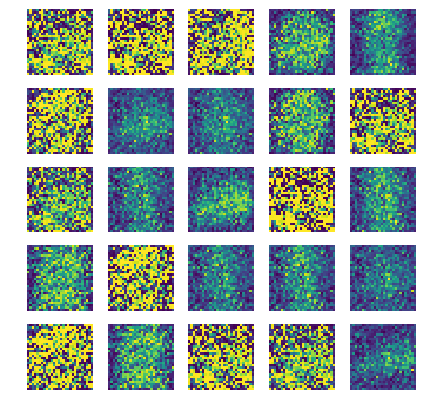

351 [D loss: 0.402881, acc.: 81.25%] [G loss: 1.435153]
352 [D loss: 0.404268, acc.: 79.69%] [G loss: 2.105028]
353 [D loss: 0.427010, acc.: 92.19%] [G loss: 1.918858]
354 [D loss: 0.473717, acc.: 78.12%] [G loss: 2.243335]
355 [D loss: 0.522688, acc.: 70.31%] [G loss: 2.232146]
356 [D loss: 0.327804, acc.: 84.38%] [G loss: 2.474085]
357 [D loss: 0.296443, acc.: 90.62%] [G loss: 2.709872]
358 [D loss: 0.394641, acc.: 82.81%] [G loss: 2.196470]
359 [D loss: 0.508202, acc.: 75.00%] [G loss: 1.818681]
360 [D loss: 0.286870, acc.: 95.31%] [G loss: 2.071868]
361 [D loss: 0.533736, acc.: 71.88%] [G loss: 1.533176]
362 [D loss: 0.372819, acc.: 85.94%] [G loss: 1.779942]
363 [D loss: 0.336905, acc.: 89.06%] [G loss: 2.551707]
364 [D loss: 0.466672, acc.: 71.88%] [G loss: 1.691500]
365 [D loss: 0.339271, acc.: 89.06%] [G loss: 1.811750]
366 [D loss: 0.485136, acc.: 78.12%] [G loss: 2.177938]
367 [D loss: 0.412496, acc.: 85.94%] [G loss: 1.652182]
368 [D loss: 0.386318, acc.: 84.38%] [G loss: 1.

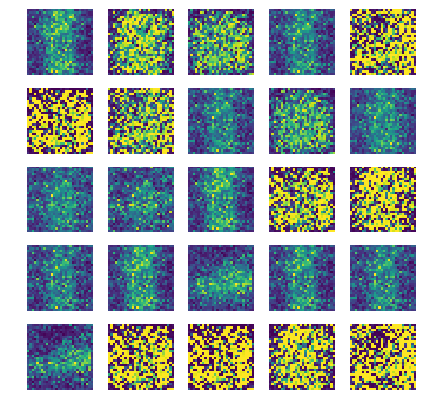

401 [D loss: 0.417045, acc.: 87.50%] [G loss: 1.719003]
402 [D loss: 0.354735, acc.: 85.94%] [G loss: 1.494318]
403 [D loss: 0.423970, acc.: 79.69%] [G loss: 1.761409]
404 [D loss: 0.501638, acc.: 79.69%] [G loss: 1.980849]
405 [D loss: 0.568800, acc.: 85.94%] [G loss: 1.543705]
406 [D loss: 0.447259, acc.: 79.69%] [G loss: 1.694520]
407 [D loss: 0.336039, acc.: 96.88%] [G loss: 2.085259]
408 [D loss: 0.446474, acc.: 78.12%] [G loss: 2.187564]
409 [D loss: 0.480617, acc.: 75.00%] [G loss: 1.824373]
410 [D loss: 0.469318, acc.: 82.81%] [G loss: 1.636343]
411 [D loss: 0.271867, acc.: 93.75%] [G loss: 1.709783]
412 [D loss: 0.525189, acc.: 71.88%] [G loss: 2.178235]
413 [D loss: 0.396439, acc.: 85.94%] [G loss: 1.894965]
414 [D loss: 0.371627, acc.: 92.19%] [G loss: 1.803947]
415 [D loss: 0.271834, acc.: 96.88%] [G loss: 1.727254]
416 [D loss: 0.465887, acc.: 68.75%] [G loss: 1.799054]
417 [D loss: 0.398302, acc.: 85.94%] [G loss: 1.578904]
418 [D loss: 0.354918, acc.: 87.50%] [G loss: 2.

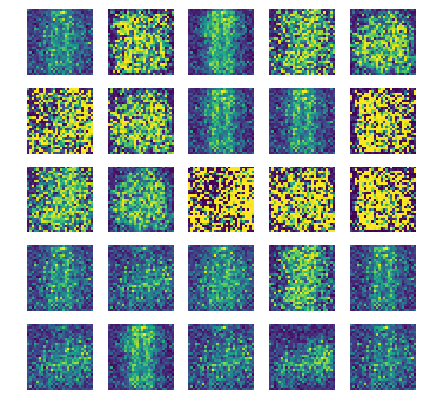

451 [D loss: 0.502935, acc.: 78.12%] [G loss: 1.481996]
452 [D loss: 0.539281, acc.: 70.31%] [G loss: 1.529156]
453 [D loss: 0.459120, acc.: 84.38%] [G loss: 1.716466]
454 [D loss: 0.480480, acc.: 64.06%] [G loss: 1.499583]
455 [D loss: 0.578568, acc.: 75.00%] [G loss: 1.894280]
456 [D loss: 0.498146, acc.: 70.31%] [G loss: 1.612284]
457 [D loss: 0.554243, acc.: 64.06%] [G loss: 1.323248]
458 [D loss: 0.441285, acc.: 89.06%] [G loss: 1.874019]
459 [D loss: 0.650047, acc.: 79.69%] [G loss: 1.655139]
460 [D loss: 0.509346, acc.: 68.75%] [G loss: 1.787403]
461 [D loss: 0.453889, acc.: 79.69%] [G loss: 1.783516]
462 [D loss: 0.418486, acc.: 79.69%] [G loss: 1.904844]
463 [D loss: 0.503048, acc.: 81.25%] [G loss: 2.146178]
464 [D loss: 0.554924, acc.: 60.94%] [G loss: 2.066595]
465 [D loss: 0.372348, acc.: 87.50%] [G loss: 2.008063]
466 [D loss: 0.500164, acc.: 84.38%] [G loss: 1.697604]
467 [D loss: 0.401092, acc.: 82.81%] [G loss: 1.487636]
468 [D loss: 0.570678, acc.: 78.12%] [G loss: 1.

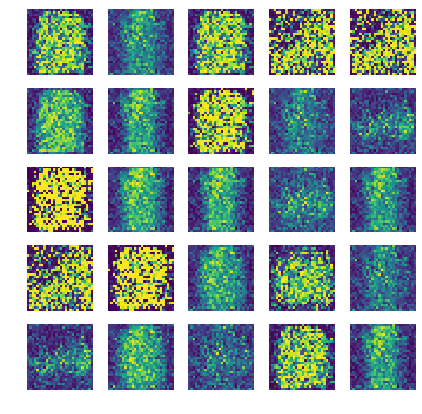

501 [D loss: 0.514347, acc.: 68.75%] [G loss: 1.738262]
502 [D loss: 0.559331, acc.: 67.19%] [G loss: 1.740946]
503 [D loss: 0.459585, acc.: 78.12%] [G loss: 1.657377]
504 [D loss: 0.365441, acc.: 89.06%] [G loss: 2.239466]
505 [D loss: 0.412187, acc.: 84.38%] [G loss: 1.688564]
506 [D loss: 0.572360, acc.: 65.62%] [G loss: 1.719316]
507 [D loss: 0.428184, acc.: 84.38%] [G loss: 1.466769]
508 [D loss: 0.351397, acc.: 93.75%] [G loss: 1.319517]
509 [D loss: 0.442553, acc.: 76.56%] [G loss: 1.737684]
510 [D loss: 0.420890, acc.: 87.50%] [G loss: 1.559711]
511 [D loss: 0.540255, acc.: 75.00%] [G loss: 1.478066]
512 [D loss: 0.535682, acc.: 82.81%] [G loss: 1.196402]
513 [D loss: 0.399206, acc.: 85.94%] [G loss: 2.143101]
514 [D loss: 0.588221, acc.: 71.88%] [G loss: 1.796561]
515 [D loss: 0.353162, acc.: 93.75%] [G loss: 1.460419]
516 [D loss: 0.536769, acc.: 78.12%] [G loss: 1.252355]
517 [D loss: 0.379157, acc.: 78.12%] [G loss: 1.415749]
518 [D loss: 0.478138, acc.: 76.56%] [G loss: 1.

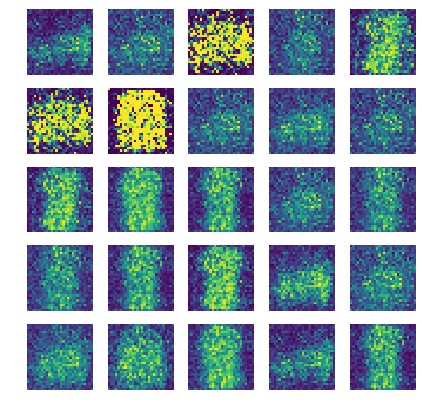

551 [D loss: 0.733926, acc.: 71.88%] [G loss: 1.194151]
552 [D loss: 0.572614, acc.: 62.50%] [G loss: 1.085675]
553 [D loss: 0.547985, acc.: 73.44%] [G loss: 1.324886]
554 [D loss: 0.482813, acc.: 75.00%] [G loss: 1.316535]
555 [D loss: 0.603689, acc.: 62.50%] [G loss: 1.373091]
556 [D loss: 0.576753, acc.: 68.75%] [G loss: 1.334943]
557 [D loss: 0.713876, acc.: 53.12%] [G loss: 1.230696]
558 [D loss: 0.560500, acc.: 64.06%] [G loss: 1.607641]
559 [D loss: 0.556213, acc.: 68.75%] [G loss: 1.500044]
560 [D loss: 0.482525, acc.: 81.25%] [G loss: 1.297880]
561 [D loss: 0.482581, acc.: 73.44%] [G loss: 1.437775]
562 [D loss: 0.441110, acc.: 89.06%] [G loss: 1.333658]
563 [D loss: 0.642396, acc.: 71.88%] [G loss: 1.715903]
564 [D loss: 0.479950, acc.: 73.44%] [G loss: 1.456687]
565 [D loss: 0.525909, acc.: 75.00%] [G loss: 1.407381]
566 [D loss: 0.548048, acc.: 73.44%] [G loss: 1.480633]
567 [D loss: 0.570715, acc.: 64.06%] [G loss: 1.460302]
568 [D loss: 0.617909, acc.: 73.44%] [G loss: 1.

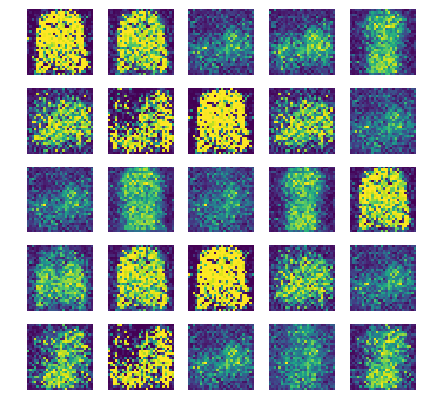

601 [D loss: 0.561855, acc.: 62.50%] [G loss: 1.261574]
602 [D loss: 0.763753, acc.: 67.19%] [G loss: 1.182199]
603 [D loss: 0.676385, acc.: 51.56%] [G loss: 1.094837]
604 [D loss: 0.667993, acc.: 50.00%] [G loss: 1.062881]
605 [D loss: 0.471333, acc.: 84.38%] [G loss: 1.250838]
606 [D loss: 0.697213, acc.: 68.75%] [G loss: 1.123319]
607 [D loss: 0.614034, acc.: 67.19%] [G loss: 1.062835]
608 [D loss: 0.532759, acc.: 71.88%] [G loss: 1.286961]
609 [D loss: 0.539435, acc.: 71.88%] [G loss: 1.166973]
610 [D loss: 0.687391, acc.: 71.88%] [G loss: 1.396730]
611 [D loss: 0.504617, acc.: 78.12%] [G loss: 1.141758]
612 [D loss: 0.490192, acc.: 73.44%] [G loss: 1.137269]
613 [D loss: 0.486374, acc.: 70.31%] [G loss: 1.202565]
614 [D loss: 0.628084, acc.: 76.56%] [G loss: 1.420743]
615 [D loss: 0.494961, acc.: 76.56%] [G loss: 1.364129]
616 [D loss: 0.509017, acc.: 85.94%] [G loss: 1.353693]
617 [D loss: 0.641828, acc.: 70.31%] [G loss: 1.177394]
618 [D loss: 0.545334, acc.: 60.94%] [G loss: 1.

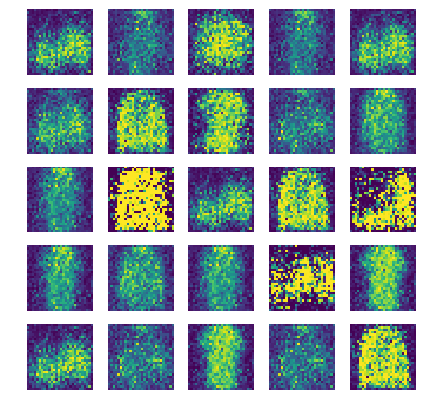

651 [D loss: 0.742232, acc.: 51.56%] [G loss: 0.980980]
652 [D loss: 0.587369, acc.: 62.50%] [G loss: 1.044479]
653 [D loss: 0.697883, acc.: 51.56%] [G loss: 0.970307]
654 [D loss: 0.742795, acc.: 53.12%] [G loss: 0.929339]
655 [D loss: 0.602555, acc.: 59.38%] [G loss: 1.055181]
656 [D loss: 0.553021, acc.: 71.88%] [G loss: 1.017267]
657 [D loss: 0.431017, acc.: 81.25%] [G loss: 1.359329]
658 [D loss: 0.701471, acc.: 59.38%] [G loss: 1.173790]
659 [D loss: 0.486050, acc.: 81.25%] [G loss: 1.157880]
660 [D loss: 0.587669, acc.: 68.75%] [G loss: 1.110939]
661 [D loss: 0.709585, acc.: 64.06%] [G loss: 1.047407]
662 [D loss: 0.640667, acc.: 54.69%] [G loss: 0.936094]
663 [D loss: 0.577812, acc.: 73.44%] [G loss: 1.053987]
664 [D loss: 0.659171, acc.: 67.19%] [G loss: 1.070282]
665 [D loss: 0.633971, acc.: 64.06%] [G loss: 1.247412]
666 [D loss: 0.637390, acc.: 70.31%] [G loss: 1.086922]
667 [D loss: 0.699381, acc.: 54.69%] [G loss: 0.878448]
668 [D loss: 0.677787, acc.: 56.25%] [G loss: 0.

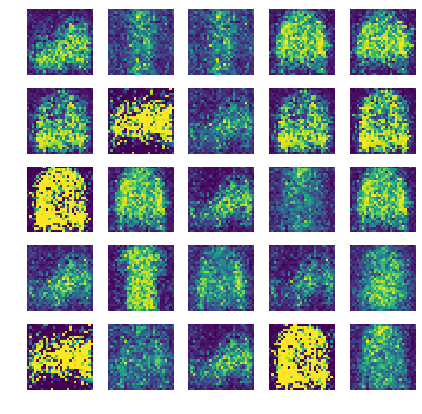

701 [D loss: 0.733068, acc.: 51.56%] [G loss: 1.056563]
702 [D loss: 0.790239, acc.: 45.31%] [G loss: 0.965519]
703 [D loss: 0.746373, acc.: 45.31%] [G loss: 0.880234]
704 [D loss: 0.630517, acc.: 51.56%] [G loss: 0.885202]
705 [D loss: 0.610122, acc.: 53.12%] [G loss: 0.961745]
706 [D loss: 0.553990, acc.: 67.19%] [G loss: 1.091835]
707 [D loss: 0.725669, acc.: 51.56%] [G loss: 0.962878]
708 [D loss: 0.518772, acc.: 68.75%] [G loss: 1.108652]
709 [D loss: 0.725492, acc.: 64.06%] [G loss: 1.009151]
710 [D loss: 0.718048, acc.: 57.81%] [G loss: 1.016684]
711 [D loss: 0.547875, acc.: 76.56%] [G loss: 1.009903]
712 [D loss: 0.634798, acc.: 62.50%] [G loss: 1.056863]
713 [D loss: 0.570098, acc.: 62.50%] [G loss: 0.930548]
714 [D loss: 0.674966, acc.: 56.25%] [G loss: 0.997841]
715 [D loss: 0.627734, acc.: 70.31%] [G loss: 1.028379]
716 [D loss: 0.550033, acc.: 67.19%] [G loss: 1.033073]
717 [D loss: 0.611538, acc.: 65.62%] [G loss: 0.953458]
718 [D loss: 0.653557, acc.: 60.94%] [G loss: 1.

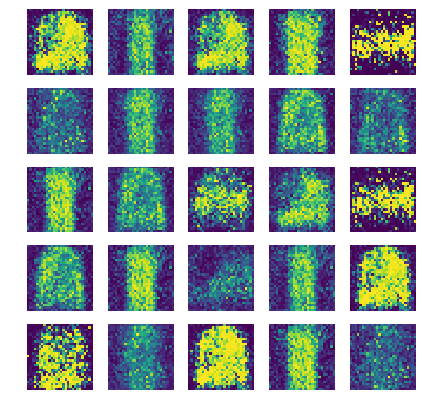

751 [D loss: 0.707167, acc.: 60.94%] [G loss: 0.984563]
752 [D loss: 0.697487, acc.: 54.69%] [G loss: 0.870820]
753 [D loss: 0.573325, acc.: 67.19%] [G loss: 0.991315]
754 [D loss: 0.643810, acc.: 56.25%] [G loss: 0.944806]
755 [D loss: 0.668869, acc.: 53.12%] [G loss: 1.066720]
756 [D loss: 0.625751, acc.: 59.38%] [G loss: 0.951287]
757 [D loss: 0.673084, acc.: 48.44%] [G loss: 0.854171]
758 [D loss: 0.726976, acc.: 59.38%] [G loss: 0.861786]
759 [D loss: 0.651949, acc.: 57.81%] [G loss: 0.864327]
760 [D loss: 0.713339, acc.: 50.00%] [G loss: 0.905353]
761 [D loss: 0.675849, acc.: 50.00%] [G loss: 0.933945]
762 [D loss: 0.615348, acc.: 60.94%] [G loss: 0.979230]
763 [D loss: 0.622064, acc.: 54.69%] [G loss: 0.880999]
764 [D loss: 0.722931, acc.: 43.75%] [G loss: 0.838909]
765 [D loss: 0.682727, acc.: 56.25%] [G loss: 0.864126]
766 [D loss: 0.618463, acc.: 57.81%] [G loss: 0.908495]
767 [D loss: 0.685085, acc.: 53.12%] [G loss: 0.902456]
768 [D loss: 0.639062, acc.: 51.56%] [G loss: 0.

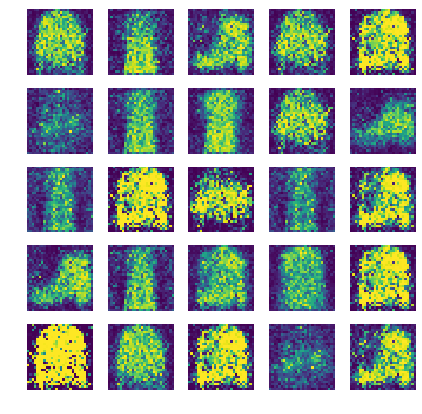

801 [D loss: 0.707879, acc.: 56.25%] [G loss: 0.843455]
802 [D loss: 0.742178, acc.: 50.00%] [G loss: 0.830911]
803 [D loss: 0.700091, acc.: 48.44%] [G loss: 0.891935]
804 [D loss: 0.691449, acc.: 48.44%] [G loss: 0.944667]
805 [D loss: 0.685169, acc.: 56.25%] [G loss: 0.925670]
806 [D loss: 0.643876, acc.: 62.50%] [G loss: 1.033672]
807 [D loss: 0.681831, acc.: 59.38%] [G loss: 0.912077]
808 [D loss: 0.795048, acc.: 42.19%] [G loss: 0.801599]
809 [D loss: 0.669879, acc.: 51.56%] [G loss: 0.839457]
810 [D loss: 0.629205, acc.: 65.62%] [G loss: 0.876628]
811 [D loss: 0.622656, acc.: 59.38%] [G loss: 0.830769]
812 [D loss: 0.641067, acc.: 59.38%] [G loss: 0.892393]
813 [D loss: 0.693798, acc.: 57.81%] [G loss: 0.867868]
814 [D loss: 0.720682, acc.: 50.00%] [G loss: 0.896045]
815 [D loss: 0.629526, acc.: 67.19%] [G loss: 0.949081]
816 [D loss: 0.623888, acc.: 64.06%] [G loss: 0.913156]
817 [D loss: 0.709906, acc.: 51.56%] [G loss: 0.864419]
818 [D loss: 0.751606, acc.: 48.44%] [G loss: 0.

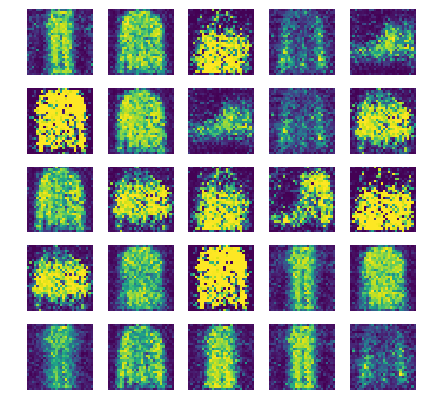

851 [D loss: 0.618732, acc.: 56.25%] [G loss: 0.870444]
852 [D loss: 0.576960, acc.: 68.75%] [G loss: 0.879644]
853 [D loss: 0.745752, acc.: 48.44%] [G loss: 0.872694]
854 [D loss: 0.706727, acc.: 56.25%] [G loss: 0.831906]
855 [D loss: 0.668230, acc.: 56.25%] [G loss: 0.896846]
856 [D loss: 0.747470, acc.: 50.00%] [G loss: 0.901579]
857 [D loss: 0.737665, acc.: 50.00%] [G loss: 0.884403]
858 [D loss: 0.667241, acc.: 53.12%] [G loss: 0.863710]
859 [D loss: 0.718987, acc.: 48.44%] [G loss: 0.845699]
860 [D loss: 0.712370, acc.: 56.25%] [G loss: 0.831395]
861 [D loss: 0.703984, acc.: 54.69%] [G loss: 0.794622]
862 [D loss: 0.743595, acc.: 43.75%] [G loss: 0.800720]
863 [D loss: 0.734609, acc.: 46.88%] [G loss: 0.837821]
864 [D loss: 0.649295, acc.: 60.94%] [G loss: 0.824855]
865 [D loss: 0.690524, acc.: 43.75%] [G loss: 0.775928]
866 [D loss: 0.738927, acc.: 42.19%] [G loss: 0.788236]
867 [D loss: 0.671485, acc.: 46.88%] [G loss: 0.816395]
868 [D loss: 0.791450, acc.: 46.88%] [G loss: 0.

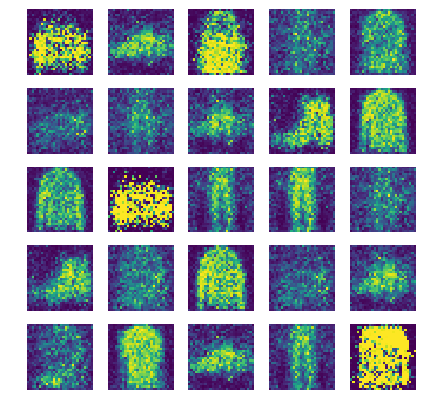

901 [D loss: 0.645646, acc.: 60.94%] [G loss: 0.854066]
902 [D loss: 0.680587, acc.: 53.12%] [G loss: 0.790254]
903 [D loss: 0.658479, acc.: 60.94%] [G loss: 0.806742]
904 [D loss: 0.638631, acc.: 64.06%] [G loss: 0.838166]
905 [D loss: 0.656626, acc.: 59.38%] [G loss: 0.794530]
906 [D loss: 0.696115, acc.: 60.94%] [G loss: 0.824284]
907 [D loss: 0.802326, acc.: 50.00%] [G loss: 0.752599]
908 [D loss: 0.671210, acc.: 56.25%] [G loss: 0.805638]
909 [D loss: 0.717225, acc.: 56.25%] [G loss: 0.892375]
910 [D loss: 0.657970, acc.: 50.00%] [G loss: 0.823359]
911 [D loss: 0.694646, acc.: 50.00%] [G loss: 0.809495]
912 [D loss: 0.676652, acc.: 48.44%] [G loss: 0.790541]
913 [D loss: 0.727372, acc.: 54.69%] [G loss: 0.848409]
914 [D loss: 0.695741, acc.: 54.69%] [G loss: 0.793031]
915 [D loss: 0.760162, acc.: 42.19%] [G loss: 0.820907]
916 [D loss: 0.727097, acc.: 45.31%] [G loss: 0.772775]
917 [D loss: 0.646822, acc.: 57.81%] [G loss: 0.855220]
918 [D loss: 0.666467, acc.: 53.12%] [G loss: 0.

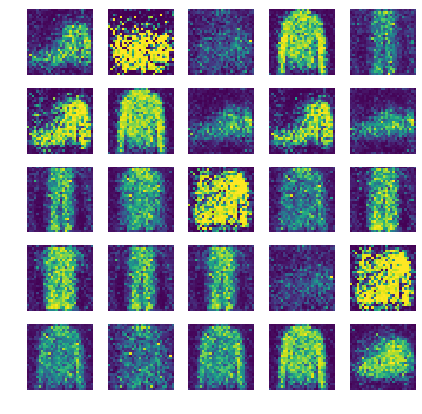

951 [D loss: 0.680553, acc.: 46.88%] [G loss: 0.831612]
952 [D loss: 0.746443, acc.: 54.69%] [G loss: 0.778829]
953 [D loss: 0.676290, acc.: 51.56%] [G loss: 0.856099]
954 [D loss: 0.719060, acc.: 45.31%] [G loss: 0.827313]
955 [D loss: 0.681619, acc.: 51.56%] [G loss: 0.825149]
956 [D loss: 0.640892, acc.: 62.50%] [G loss: 0.788500]
957 [D loss: 0.680120, acc.: 54.69%] [G loss: 0.820056]
958 [D loss: 0.667974, acc.: 51.56%] [G loss: 0.824011]
959 [D loss: 0.694443, acc.: 50.00%] [G loss: 0.864433]
960 [D loss: 0.711872, acc.: 45.31%] [G loss: 0.832582]
961 [D loss: 0.666778, acc.: 56.25%] [G loss: 0.781009]
962 [D loss: 0.749601, acc.: 39.06%] [G loss: 0.742025]
963 [D loss: 0.674591, acc.: 56.25%] [G loss: 0.824303]
964 [D loss: 0.646529, acc.: 64.06%] [G loss: 0.875106]
965 [D loss: 0.771969, acc.: 50.00%] [G loss: 0.803802]
966 [D loss: 0.633842, acc.: 70.31%] [G loss: 0.831883]
967 [D loss: 0.679117, acc.: 64.06%] [G loss: 0.805393]
968 [D loss: 0.768015, acc.: 39.06%] [G loss: 0.

In [49]:
epochs = 1000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

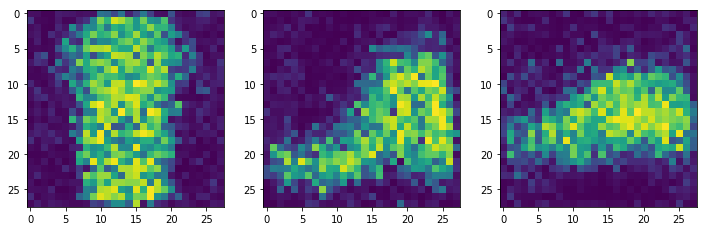

In [52]:
r, c = 7, 7
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0])
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0])
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0])
plt.show()
plt.close()